In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [8]:
!ls

 1.ipynb			  face_embedding
 김영협_2.ipynb			  image.jpeg
 array_archive.npz		  image.png
 arrays_compressed.npz		  images1.png
'Bike Sharing Demand.ipynb'	  kaggle_kakr_housing
 camera_sticker			  lost+found
 data_preprocess		  lyricist
 data_represent			  pokemon
 data_visualization		  pokemon_eda
 DuSiDataTeam4			  python_image_proc
'[E-1]rock_scissor_paper.ipynb'   rock_scissor_paper
'[E-3]camera_sticker.ipynb'	  rock_scissor_paper_test
'[E-4]lyric_writer.ipynb'	  some_array.npy
'[E-5]celebrity1.ipynb'		  train_1.csv
'[E-5]celebrity.ipynb'		  train.csv


In [3]:
dailyData = pd.read_csv("../aiffel/train.csv") #..은 상위폴더로 갈 수 있는 것!

*Feature Engineering*

**위의 결과에서 알 수 있듯이, "계절", "휴일", "근무일" 및 "날씨" 열은 "Categorical" 데이터 유형이어야 합니다.<br>
그러나 현재 데이터 유형은 해당 열의 "int"입니다. 데이터셋을 다음과 같은 방법으로 변환하여 EDA를 시작할 수 있도록 지원합니다.**

**•"datetime" 열에서 "date", "hour", "weekDay", "month" 열을 만듭니다.<br>
•"계절", "휴일", "근무일" 및 날씨의 데이터 유형을 카테고리로 강제 지정합니다.<br>
•날짜 시간 열에서 유용한 기능을 이미 추출했으므로 해당 열을 삭제하십시오.**

**"Datetime" 열에서 새 열 작성**

In [4]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

*Coercing To Category Type*

In [5]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

*Dropping Unncessary Columns*

In [6]:
dailyData  = dailyData.drop(["datetime"],axis=1)

*Lets Start With Very Simple Visualization Of Variables DataType Count*

<AxesSubplot:xlabel='variableType', ylabel='count'>

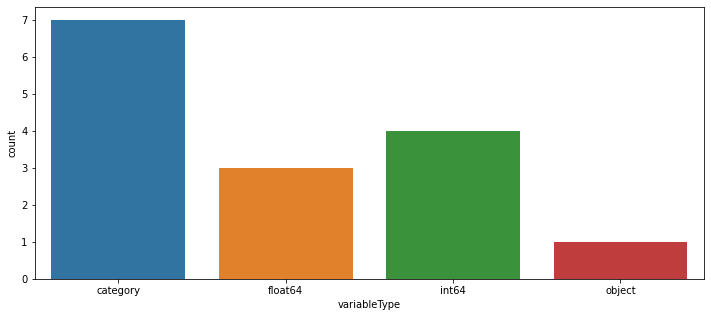

In [15]:
#dataTypeDf = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
#fig,ax = plt.subplots()
#fig.set_size_inches(12,5)
#sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
#ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

typesCountSerie = dailyData.dtypes.value_counts()

#format columns as arrays of either strings or integers
#typeNames are easier to sort as array of 'string' rather than an array of 'dtype'
typeNamesColumn = list(map(lambda t: t.name , typesCountSerie.index.values));
typeCountColumn = typesCountSerie.values

#create an initial dataframe, with multiple occurences of the same "variableType"
intialDataTypeDf = pd.DataFrame({
    "variableType" : typeNamesColumn,
    "count" : typeCountColumn
})

groupedDataTypeDf = intialDataTypeDf.groupby(['variableType']).sum()[['count']].reset_index()

fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=groupedDataTypeDf, x="variableType",y="count", ax=ax)
